In [143]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
# matplotlib.rcParams['figure.figsize'] = (16, 10)
from sklearn import linear_model
from scipy import stats
import os
import datetime
import seaborn as sns
sns.set(color_codes=True)

cs = ['r', 'b', 'g', 'c']
DEBUG_DIR = '/home/denis/.birales/debug/detection'
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]


def plot_candidate(root, csv_file):    
    df = pd.read_csv(os.path.join(DEBUG_DIR, root, csv_file), dtype={'time': datetime.datetime})
    ax = df.plot.scatter(x='channel', y='time_sample', style='.', title=root)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['channel'],df['time_sample'])
        
    print(root)
    print('Score:', df[['time_sample', 'channel']].corr().iloc[0,1])
    print('Size:', df['channel'].size)
    print('Gradient:', slope, r_value, p_value)
    print('No. of activated beams:', df['beam_id'].unique().size)
    print('Mean Doppler Shift:', (410.105 - df['channel'].mean())*1e6)
    print('Mean Channel:', df['channel'].mean())
    print()

20180314
Score: -0.999479976992
Size: 5533
Gradient: -74295.5717993 -0.999479976992 0.0
No. of activated beams: 32
Mean Doppler Shift: -6754.554451504191
Mean Channel: 410.1117545544515

20180313
Score: -0.999664690297
Size: 5526
Gradient: -75410.7287394 -0.999664690297 0.0
No. of activated beams: 32
Mean Doppler Shift: 32245.934970489998
Mean Channel: 410.0727540650295



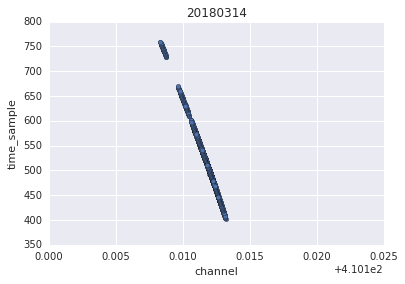

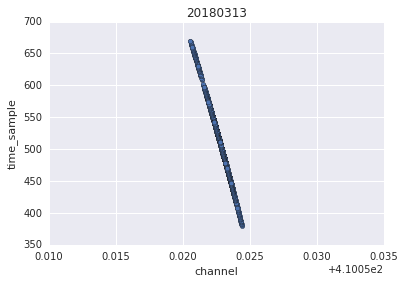

In [139]:
plot_candidate('20180314', 'BIRALES_OUT_20170630_001.csv')
plot_candidate('20180313', 'BIRALES_OUT_20170630_001.csv')


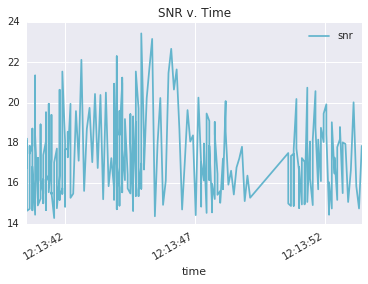

In [13]:
df[l.inlier_mask_].plot(x='time', y='snr',color=cs[3], title='SNR v. Time')

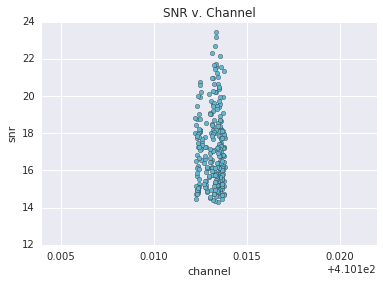

In [11]:
df[l.inlier_mask_].plot(x='channel', y='snr', kind='scatter', color=cs[3], title='SNR v. Channel')